In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
# Load Dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df_heart = pd.read_csv(url)
print("Contoh data:")
print(df_heart.head())

Contoh data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [3]:
# Cek Missing Values
missing_values = df_heart.isnull().sum().reset_index()
missing_values.columns = ["Kolom", "Jumlah Missing Values"]
print("\nMissing Values:")
print(tabulate(missing_values, headers='keys', tablefmt='grid'))



Missing Values:
+----+----------+-------------------------+
|    | Kolom    |   Jumlah Missing Values |
+====+==========+=========================+
|  0 | age      |                       0 |
+----+----------+-------------------------+
|  1 | sex      |                       0 |
+----+----------+-------------------------+
|  2 | cp       |                       0 |
+----+----------+-------------------------+
|  3 | trestbps |                       0 |
+----+----------+-------------------------+
|  4 | chol     |                       0 |
+----+----------+-------------------------+
|  5 | fbs      |                       0 |
+----+----------+-------------------------+
|  6 | restecg  |                       0 |
+----+----------+-------------------------+
|  7 | thalach  |                       0 |
+----+----------+-------------------------+
|  8 | exang    |                       0 |
+----+----------+-------------------------+
|  9 | oldpeak  |                       0 |
+----+---------

In [4]:
# Hapus baris dengan nilai NaN
df_heart = df_heart.dropna()

In [6]:
# Preprocessing Data
X = df_heart.drop(columns=['num'])
y = df_heart['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalisasi Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Pelatihan Model Logistic Regression
model = LogisticRegression(max_iter=200, solver='lbfgs')  # Menambahkan parameter solver untuk kejelasan
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [9]:
# Prediksi
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

In [10]:
# Evaluasi Model
print("\nEvaluasi Model:")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.4f}")
print(f"Presisi: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='macro'):.4f}")
print(f"AUC: {roc_auc_score(y_test, y_prob, multi_class='ovr'):.4f}")


Evaluasi Model:
Akurasi: 0.6167
Presisi: 0.3248
Recall: 0.2797
F1-Score: 0.2867
AUC: 0.7617


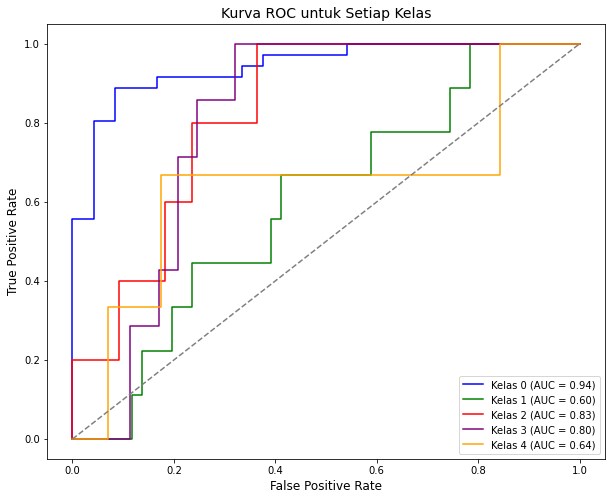

In [12]:

# Visualisasi ROC Curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'purple', 'orange']  # Mengubah warna kurva

for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
    auc = roc_auc_score((y_test == i).astype(int), y_prob[:, i])
    plt.plot(fpr, tpr, color=colors[i], label=f'Kelas {i} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Kurva ROC untuk Setiap Kelas', fontsize=14)
plt.legend(loc='lower right')
plt.show()

# Penjelasan

# 1. Logistic Regression (Fungsi Sigmoid)

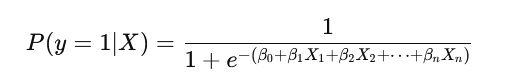

- Ini adalah fungsi sigmoid yang digunakan dalam regresi logistik untuk menghitung probabilitas suatu sampel termasuk dalam kelas positif (y=1y=1).
- Koefisien ββ merupakan bobot yang dipelajari oleh model.
- Jika output fungsi sigmoid lebih dari 0.5, model mengklasifikasikan sampel ke kelas 1; jika kurang dari 0.5, ke kelas 0.

# 2. Akurasi

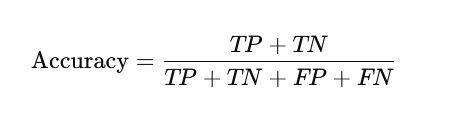

Akurasi mengukur proporsi prediksi yang benar dibandingkan dengan total sampel.
- TP (True Positive): Prediksi benar sebagai positif.
- TN (True Negative): Prediksi benar sebagai negatif.
- FP (False Positive): Prediksi salah sebagai positif.
- FN (False Negative): Prediksi salah sebagai negatif.

# 3. Precision

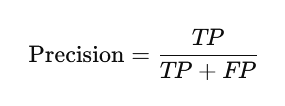

- Precision menunjukkan seberapa andal model dalam memprediksi kelas positif.
- Nilai precision yang tinggi berarti model jarang salah saat mengklasifikasikan sesuatu sebagai positif.

# 4. Recall (Sensitivity)

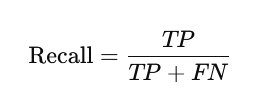

- Recall menunjukkan seberapa baik model dalam menangkap semua sampel yang benar-benar positif.
- Recall tinggi berarti model jarang melewatkan kasus positif.

# 5. F1-Score

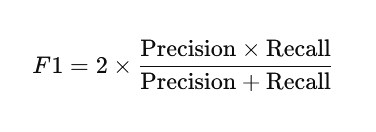

- F1-Score adalah rata-rata harmonik antara precision dan recall.
- Digunakan untuk keseimbangan antara precision dan recall.

# 6. Area Under the ROC Curve (AUC-ROC)

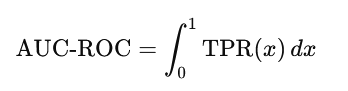

- ROC (Receiver Operating Characteristic) adalah kurva yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).
- AUC-ROC mengukur seberapa baik model membedakan antara kelas positif dan negatif.
- Jika AUC = 1, berarti model sempurna; jika AUC = 0.5, berarti model tidak lebih baik dari tebak-tebakan acak.